<a href="https://colab.research.google.com/github/Juangabuk/Bangkit-Capstone-Project_PimpleMe-/blob/main/Pimpscanv2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

In [22]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [23]:
%cd /content/gdrive/MyDrive/CAPSTONE/Datasets
!ls


/content/gdrive/MyDrive/CAPSTONE/Datasets
 109034482-young-man-with-acne-and-pimple-on-the-skin-with-brown-spots-acne-on-the-face-caused-by-hormone-or-gr.jpg
'download (3).jfif'
 face_PNG5645.png
 levle0_22.jpg
 PimpleMe.h5
 PimpleMe.tflite
 test
 train


In [24]:
import os
Level_0_dir = os.path.join('train/Level_0')
Level_1_dir = os.path.join('train/Level_1')
Level_2_dir = os.path.join('train/Level_2')


print('total training Level_0 images:', len(os.listdir(Level_0_dir)))
print('total training Level_1 images:', len(os.listdir(Level_1_dir)))
print('total training Level_2 images:', len(os.listdir(Level_2_dir)))

total training Level_0 images: 387
total training Level_1 images: 473
total training Level_2 images: 139


In [25]:
batch_size = 32
img_height = 180
img_width = 180
TRAINING_DIR = "train/"
VALIDATION_DIR = "test/"

In [26]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  TRAINING_DIR,
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  VALIDATION_DIR,
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 999 files belonging to 3 classes.
Found 257 files belonging to 3 classes.


In [27]:
class_names = train_ds.class_names
print(class_names)


['Level_0', 'Level_1', 'Level_2']


In [28]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(img_height, 
                                                              img_width,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

In [29]:
num_classes = 5

model = Sequential([
  data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(32, 3, activation='relu', padding='same'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, activation='relu', padding='same'),
  layers.MaxPooling2D(),
  layers.Conv2D(128, 3, activation='relu', padding='same'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [30]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
epochs=100
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/100
32/32 [==============================] - 76s 2s/step - loss: 1.0751 - accuracy: 0.4555 - val_loss: 1.1855 - val_accuracy: 0.4397
Epoch 2/100
32/32 [==============================] - 73s 2s/step - loss: 1.0035 - accuracy: 0.4635 - val_loss: 1.0945 - val_accuracy: 0.4047
Epoch 3/100
32/32 [==============================] - 73s 2s/step - loss: 0.9989 - accuracy: 0.4695 - val_loss: 1.0852 - val_accuracy: 0.4397
Epoch 4/100
32/32 [==============================] - 73s 2s/step - loss: 0.9965 - accuracy: 0.4354 - val_loss: 1.0930 - val_accuracy: 0.4514
Epoch 5/100
32/32 [==============================] - 73s 2s/step - loss: 0.9864 - accuracy: 0.4935 - val_loss: 1.0789 - val_accuracy: 0.4669
Epoch 6/100
32/32 [==============================] - 73s 2s/step - loss: 0.9935 - accuracy: 0.4665 - val_loss: 1.1012 - val_accuracy: 0.3191
Epoch 7/100
32/32 [==============================] - 73s 2s/step - loss: 1.0214 - accuracy: 0.4605 - val_loss: 1.1095 - val_accuracy: 0.4202
Epoch 8/100
3

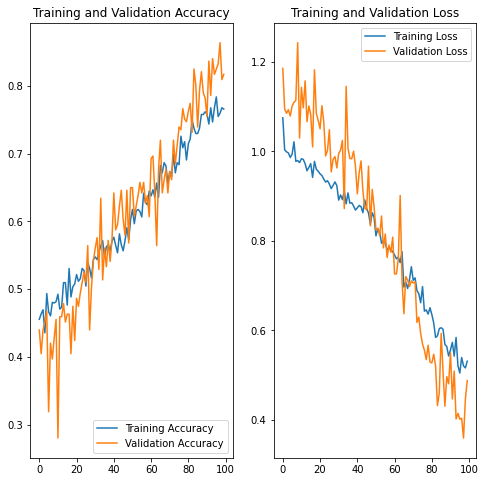

In [31]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [32]:
# Save the entire model to a HDF5 file.
# The '.h5' extension indicates that the model should be saved to HDF5.

model.save('PimpleMe.h5')

In [33]:
from keras.models import load_model

# returns a compiled model
# identical to the previous one
new_model= tf.keras.models.load_model(filepath="PimpleMe.h5")


In [37]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = keras.preprocessing.image.load_img(
      path, target_size=(img_height, img_width)
  )
  img_array = keras.preprocessing.image.img_to_array(img)
  img_array = tf.expand_dims(img_array, 0) # Create a batch

  predictions = model.predict(img_array)
  score = tf.nn.softmax(predictions[0])

  print(
      "This image most likely belongs to {} with a {:.2f} percent confidence."
      .format(class_names[np.argmax(score)], 100 * np.max(score))
  )
 

Saving 109034482-young-man-with-acne-and-pimple-on-the-skin-with-brown-spots-acne-on-the-face-caused-by-hormone-or-gr.jpg to 109034482-young-man-with-acne-and-pimple-on-the-skin-with-brown-spots-acne-on-the-face-caused-by-hormone-or-gr (1).jpg
This image most likely belongs to Level_2 with a 71.65 percent confidence.


In [35]:
# Convert the model.
converter = tf.lite.TFLiteConverter.from_keras_model(new_model)
tflite_model = converter.convert()

# Save the TF Lite model.
with tf.io.gfile.GFile('PimpleMe.tflite', 'wb') as f:
  f.write(tflite_model)